# PRACTICE Exam #3 Q1 - Supervised Learning

In this question you will perform supervised learning on the `heart-disease.csv` dataset to understand factors related to heart disease.

## Data Dictionary:

    * age - age in years
    * sex - (1 = male; 0 = female)
    * cp - chest pain type -
        -- 1: typical angina
        -- 2: atypical angina
        -- 3: non-anginal pain
        -- 4: asymptomatic
    * trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * chol - serum cholestoral in mg/dl
    * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * restecg - resting electrocardiographic results
        -- 0: normal
        -- 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
    * thalach - maximum heart rate achieved
    * exang - exercise induced angina (1 = yes; 0 = no)
    * oldpeak - ST depression induced by exercise relative to rest
    * slope - the slope of the peak exercise ST segment
        -- 1: upsloping
        -- 2: flat
        -- 3: downsloping
    * target - 1 or 0 (Has / Doesn't have heart disease)

## Questions:

### Q1.1 Open the `heart-disease.csv` dataset and explore it LIGHTLY, including some basic plots.

##### Note: The column `target` represents if the person in question has, or does not have a heart disease, and this is the target feature we will learn to predict.

### What evaluation metrics would you pair with this prediction task? Elaborate on the meaning of each metric in the context of the task. What is the baseline for this task?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
sns.set_palette('bright')
%matplotlib inline

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(732, 12)

In [3]:
# Show sample data and summary statistics
display(df.sample(5))
print()
print()
display(df.info())
print()
print()
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
442,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,0.0,0
416,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,0.0,1
275,64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0
460,39.0,1.0,3.0,160.0,147.0,1.0,0.0,160.0,0.0,0.0,0.0,0
318,46.0,1.0,4.0,110.0,236.0,0.0,0.0,125.0,1.0,2.0,2.0,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    float64
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    float64
 8   exang     732 non-null    float64
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    float64
 11  target    732 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 68.8 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.00000,732.000000,732.000000
mean,53.042350,0.762295,3.224044,132.489071,220.372951,0.148907,0.633880,139.005464,0.396175,0.88388,1.280055,0.513661
std,9.429245,0.425969,0.940978,18.411132,93.266363,0.356240,0.841697,25.729573,0.489436,1.08704,0.939765,0.500155
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.00000,0.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,197.000000,0.000000,0.000000,120.000000,0.000000,0.00000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,231.000000,0.000000,0.000000,140.000000,0.000000,0.50000,1.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,1.000000,160.000000,1.000000,1.50000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,1.000000


All numerical data.

In [4]:
# Separate features and target
TARGET = 'target'
FEATS = list(set(df.columns)-{TARGET})

X = df.drop(columns=TARGET)
y = df[TARGET]

In [5]:
# Check values
display("Unique values in each column:")
display(X.nunique().sort_values(ascending=False))
print()
print()
display("Missing values in each column:")
display(X.isnull().sum().sort_values(ascending=False))
print()
print()
display("Proportion of missing values in each column:")
display(X.isnull().sum().sort_values(ascending=False) / len(X))
print()
print()
display("Number of rows and columns:")
display(X.shape)

'Unique values in each column:'

chol        207
thalach     114
trestbps     58
age          50
oldpeak      44
cp            4
slope         4
restecg       3
sex           2
fbs           2
exang         2
dtype: int64

'Missing values in each column:'

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

'Proportion of missing values in each column:'

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
dtype: float64

'Number of rows and columns:'

(732, 11)

In [6]:
# Group continutous and binary features
FEATS_BINARY = []
FEATS_CONT = []
FEATS_DISC = []

# Iterate through each column and check the number of unique values
for column in X.columns:
    if X[column].nunique() == 2:
        FEATS_BINARY.append(column)
    elif X[column].nunique() > 40:
        FEATS_CONT.append(column)
    else:
        FEATS_DISC.append(column)

# Now FEATS_BINARY will contain the names of binary features
print("Binary Features:", FEATS_BINARY)
print("Continuous Features:", FEATS_CONT)
print("Discrete Features:", FEATS_DISC)

Binary Features: ['sex', 'fbs', 'exang']
Continuous Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Discrete Features: ['cp', 'restecg', 'slope']


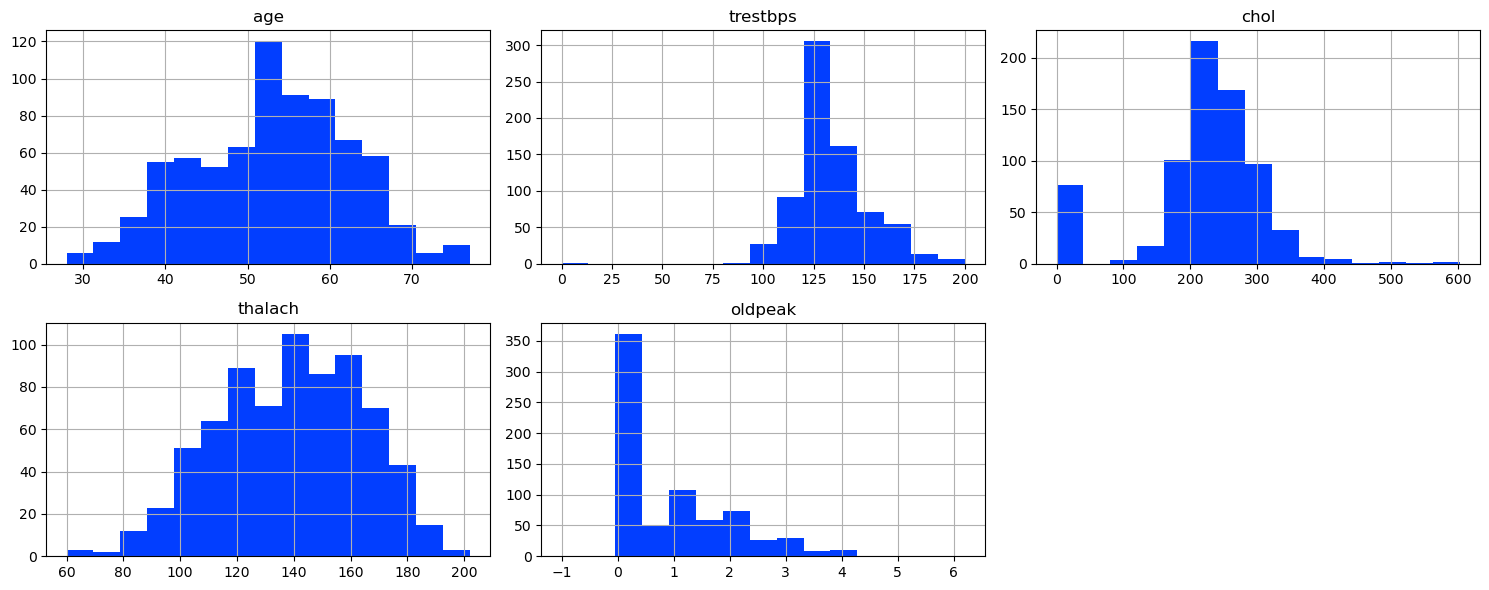

In [7]:
# Histograms for numerical data to understand distributions
X[FEATS_CONT].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

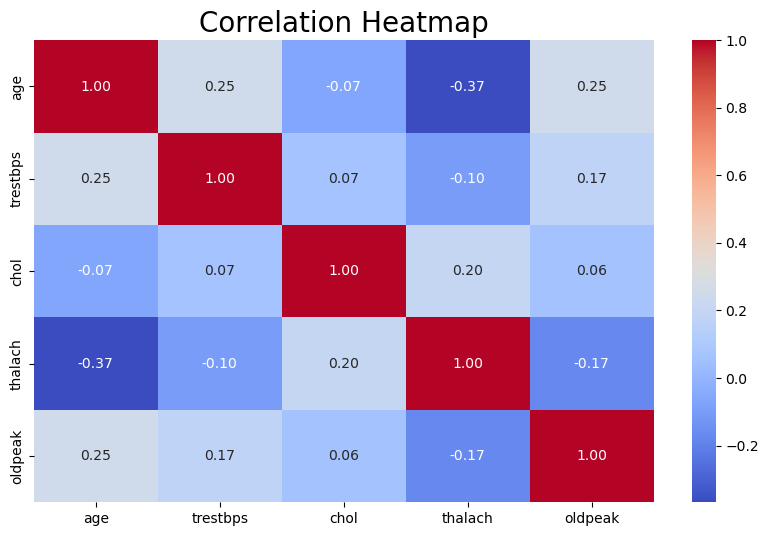

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(X[FEATS_CONT].corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontsize=20)
plt.show()

### Counts plots for binary & discrete features

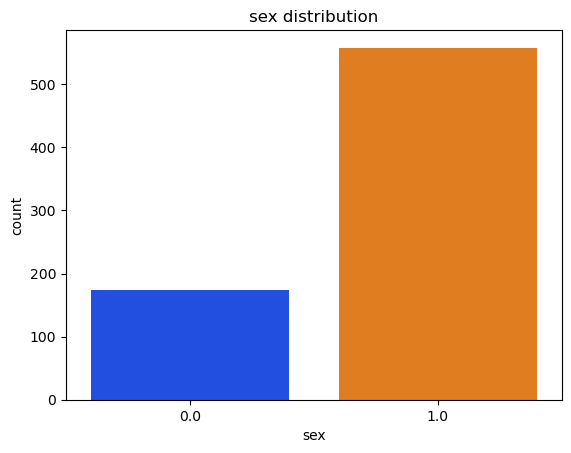

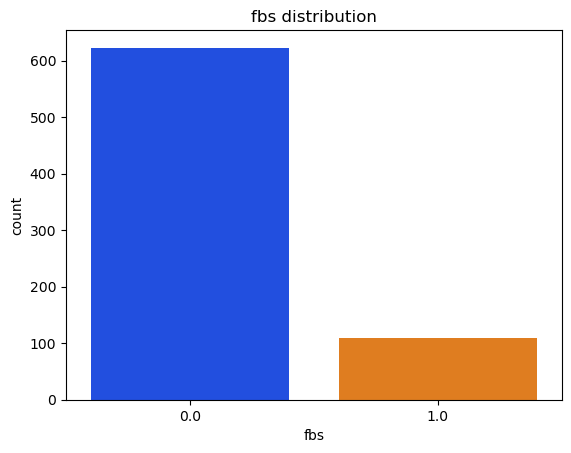

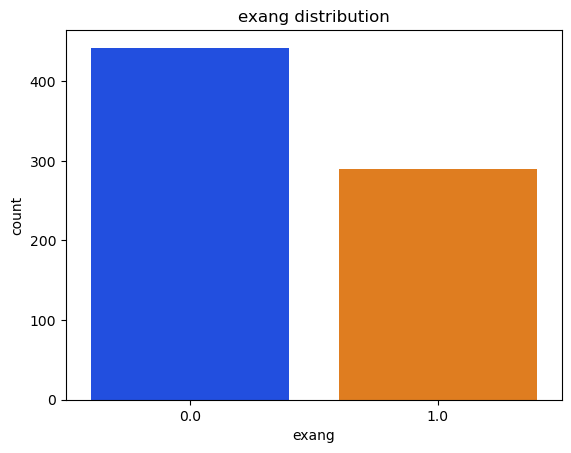

In [9]:
# Iterate through each feature in the list of binary features
for feat in FEATS_BINARY:
    
    plt.figure()
    sns.countplot(x = X[feat])
    plt.title(feat + ' distribution')
    plt.xlabel(feat)
    plt.show()

In [10]:
# Check if specific values dominant the distribution
for feat in FEATS_BINARY:
    display(f'Proportion of values in {feat}:')
    display(X[feat].value_counts(normalize=True, dropna=False))
    print()

'Proportion of values in sex:'

sex
1.0    0.762295
0.0    0.237705
Name: proportion, dtype: float64

'Proportion of values in fbs:'

fbs
0.0    0.851093
1.0    0.148907
Name: proportion, dtype: float64

'Proportion of values in exang:'

exang
0.0    0.603825
1.0    0.396175
Name: proportion, dtype: float64

High proportion of fbs. More males than females

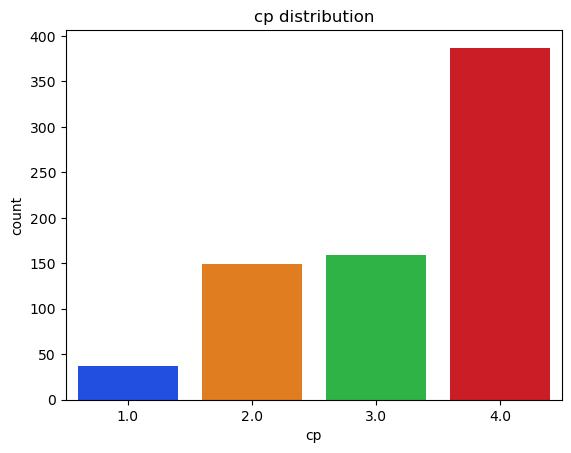

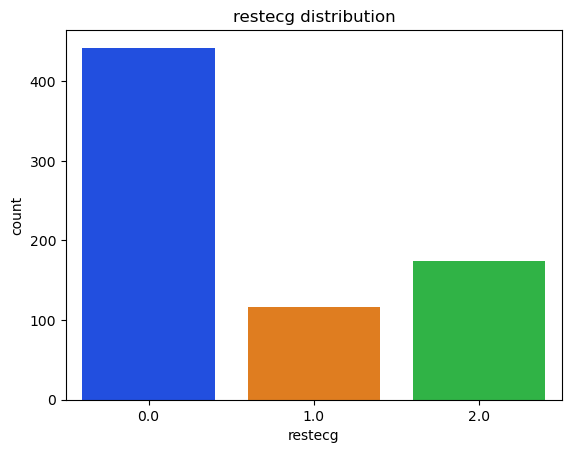

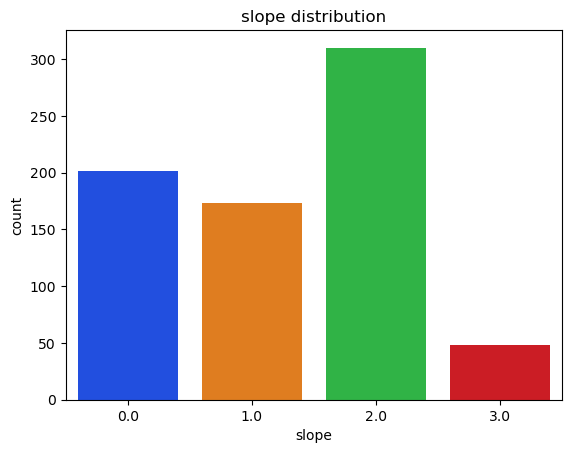

In [11]:
# Plot each feature in the list of discrete features
for feat in FEATS_DISC:
    
    plt.figure()
    sns.countplot(x = X[feat])
    plt.title(feat + ' distribution')
    plt.xlabel(feat)
    plt.show()

In [12]:
# Check if specific values dominant the distribution
for feat in FEATS_DISC:
    display(f'Proportion of values in {feat}:')
    display(X[feat].value_counts(normalize=True, dropna=False))
    print()

'Proportion of values in cp:'

cp
4.0    0.528689
3.0    0.217213
2.0    0.203552
1.0    0.050546
Name: proportion, dtype: float64

'Proportion of values in restecg:'

restecg
0.0    0.603825
2.0    0.237705
1.0    0.158470
Name: proportion, dtype: float64

'Proportion of values in slope:'

slope
2.0    0.423497
0.0    0.274590
1.0    0.236339
3.0    0.065574
Name: proportion, dtype: float64

### Target analysis

In [13]:
# Sort features by correlation with target
display("Correlation of Features with Target:")
corr_to_target = df.corr()['target'].sort_values(ascending=False)
display(corr_to_target)
print()
print()
# Create list of highlly correlated features with target
display("Features with High Correlation to Target:")
high_corr_features = corr_to_target[abs(corr_to_target.values) > 0.2].drop('target').index.tolist()
display(high_corr_features)

'Correlation of Features with Target:'

target      1.000000
exang       0.491987
cp          0.467278
slope       0.432781
oldpeak     0.413554
sex         0.297786
age         0.285450
trestbps    0.142038
fbs         0.122928
restecg     0.089886
chol       -0.142179
thalach    -0.391201
Name: target, dtype: float64

'Features with High Correlation to Target:'

['exang', 'cp', 'slope', 'oldpeak', 'sex', 'age', 'thalach']

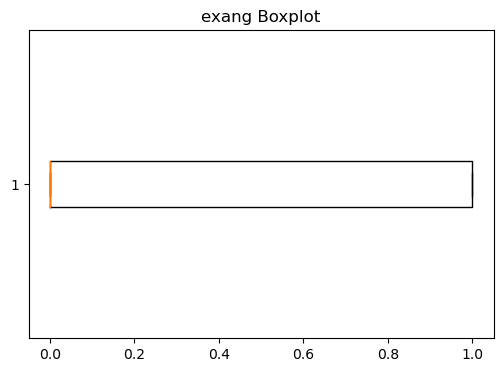

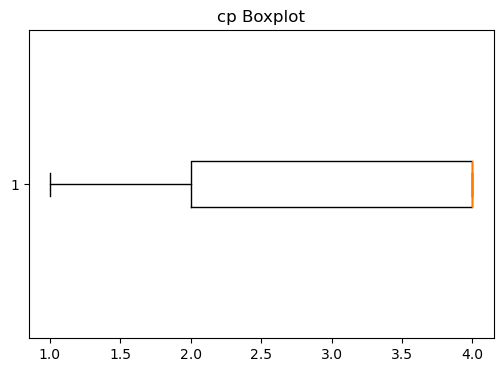

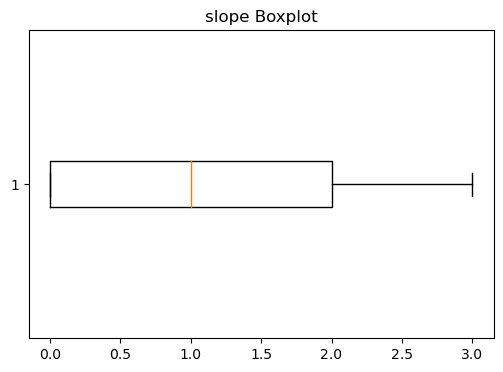

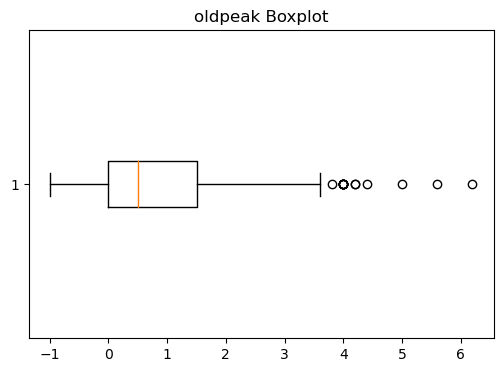

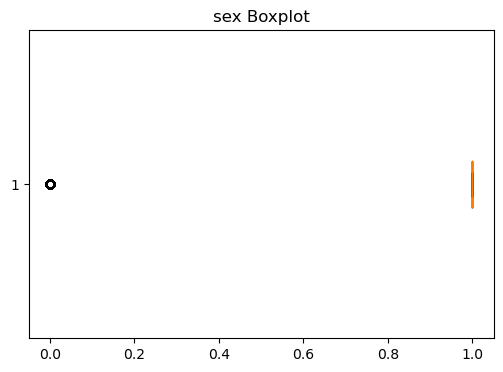

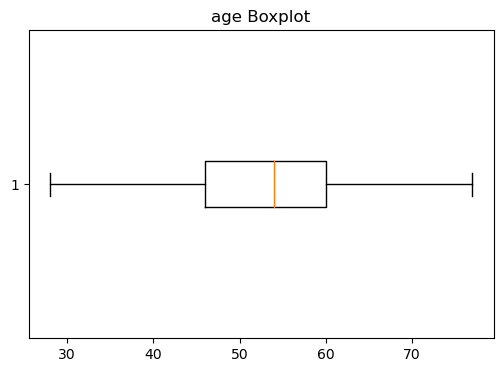

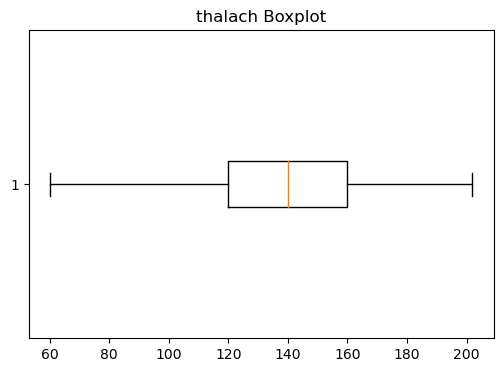

In [14]:
for col in high_corr_features:
    # Create a figure for the boxplot of the current feature.
    plt.figure(figsize=(6, 4))
    
    # Plot the boxplot of the current feature (horizontal orientation).
    plt.boxplot(X[col], vert=False)
    plt.title(f'{col} Boxplot')
    
    # Display the boxplot for the current feature.
    plt.show()

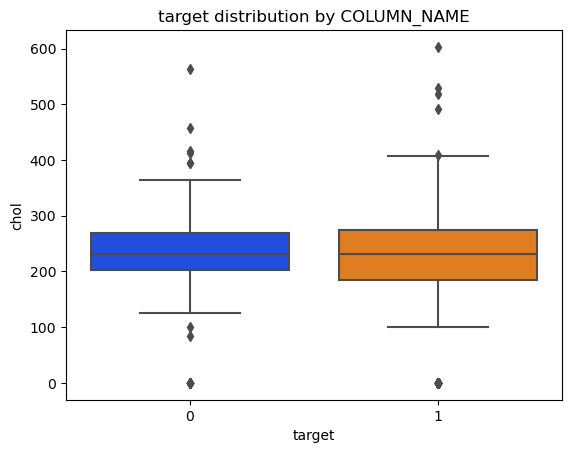

In [15]:
# Plot the boxplot for unusual correlation trends
sns.boxplot(y = 'chol', x = 'target', data = df);
plt.title(TARGET + ' distribution by COLUMN_NAME')
plt.show()

oldpeak has some outliers

In [16]:
# Check values for target
display("Unique values in target:")
display(y.unique())
print()
display("Proportion of values in target:")
display(y.value_counts(normalize=True, dropna=False))
print()
display("Missing values in target:")
display(y.isnull().sum())
print()
display("Proportion of missing values in target:")
display(y.isnull().sum() / len(y))
print()
display("Number of rows and columns:")
display(y.shape)

'Unique values in target:'

array([0, 1])

'Proportion of values in target:'

target
1    0.513661
0    0.486339
Name: proportion, dtype: float64

'Missing values in target:'

0

'Proportion of missing values in target:'

0.0

'Number of rows and columns:'

(732,)

balanced dataset, no missing values

### Divide your dataset into train and test sets. Don't forget to shuffle the data. Run a basic model (using the default hyperparameters), and report the results. THE MODEL YOU CHOOSE SHOULD HAVE ATLEAST 3 TUNABLE HYPERPARAMETERS

In [17]:
# Automatically shuffles data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Fraction of train: {X_train.shape[0] / len(X):.3f}')
print(f'Fraction of test: {X_test.shape[0] / len(X):.3f}')

Fraction of train: 0.799
Fraction of test: 0.201


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1] # probability of True

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        67
           1       0.78      0.78      0.78        80

    accuracy                           0.76       147
   macro avg       0.75      0.75      0.75       147
weighted avg       0.76      0.76      0.76       147




In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1] # probability of True

from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}\n")

tunable hyper-parameters:
- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the trees.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

### Choose features according to one method of your choice. Explain your pick. Run the same basic model that you ran before (using the default hyperparameters), using only the chosen features, and report the results.

Let's use a wrapper method

In [20]:
# Select important features with a wrapper method
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

display(importances.to_frame(name='Importance'))
# Keep features with importance greater than 0.01
important_feature_names = importances[importances.values > 0.05].index
X_train_reduced = X_train[important_feature_names]
X_test_reduced = X_test[important_feature_names]

print()
display("Removed features in train set:")
display(set(X_train) - set(X_train_reduced))
print()
display("Removed features in test set:")
display(set(X_test) - set(X_test_reduced))

,Importance
cp,0.159587
thalach,0.125722
slope,0.125579
chol,0.122719
age,0.105555
oldpeak,0.095346
exang,0.090997
trestbps,0.087733
sex,0.045666
restecg,0.028111


'Removed features in train set:'

{'fbs', 'restecg', 'sex'}

'Removed features in test set:'

{'fbs', 'restecg', 'sex'}

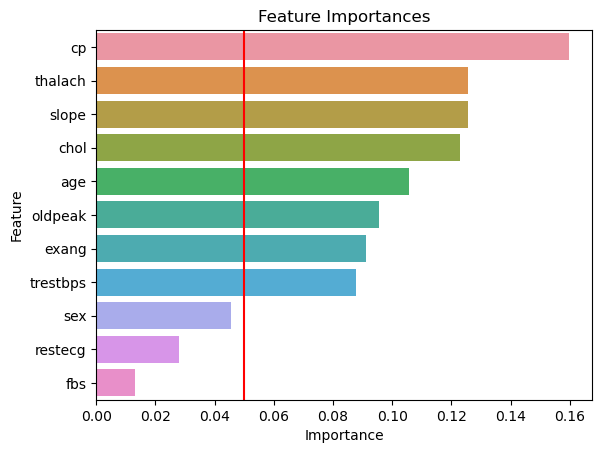

In [21]:
# Display the important features as a bar plot
sns.barplot(x=importances.values,
            y=importances.index)
plt.axvline(0.05, color='red')
plt.title('Feature Importances for RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
from xgboost import XGBClassifier

# Run xgboost model
model = XGBClassifier()
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}\n")

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        67
           1       0.81      0.74      0.77        80

    accuracy                           0.76       147
   macro avg       0.76      0.76      0.76       147
weighted avg       0.77      0.76      0.76       147




In [25]:
# Select important features with a wrapper method
importances_xb = pd.Series(model.feature_importances_, index=X_train_reduced.columns).sort_values(ascending=False)

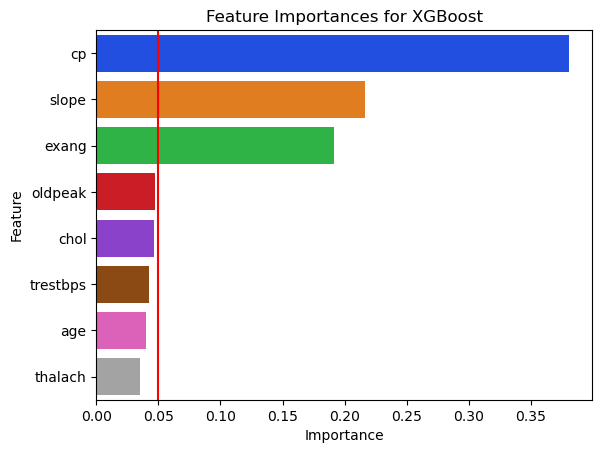

In [28]:
# Display the important features as a bar plot
sns.barplot(x=importances_xb.values,
            y=importances_xb.index)
plt.axvline(0.05, color='red')
plt.title('Feature Importances for XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Run your RandomizedSearch for hyperparameter tuning on your dataset. What was the best combination of hyper parameters? What is the score that it yielded (best model)?

In [ ]:
import random
from itertools import product
np.random.seed(31415)
from sklearn.metrics import classification_report, accuracy_score, roc_curve, \
                                        roc_auc_score

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 10, 50]
min_samples_leaf = [4, 20]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

metric = 'accuracy'
model_rs = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=param_grid,
                             scoring=metric,
                             cv=ShuffleSplit(n_splits=5), # shuffles data randomly, then cross-validates
                             random_state=0,
                             verbose=10,
                             n_iter=10, # number of randomly sampled paramater combinations
                             n_jobs=-1)

model_rs.fit(X_train_reduced, y_train)

y_pred = model_rs.predict(X_test_reduced)

In [ ]:
# Print title for best score
display("Best Score:")
display(model_rs.best_score_)
print()

# Print title for best parameters
display("Best Parameters:")
display(model_rs.best_params_)
print()

# Print title for best estimator
display("Best Estimator:")
print(model_rs.best_estimator_)

# Print classification report
print()
display("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Show default classifcation report to compare performance
print(classification_report(y_test, model.predict(X_test_reduced)))

### After your recieved results, which model do you think is the better option? Give pros and cons. Present your conclusions on a plot.

### BONUS: Use SHAP to interpret the predictions of all FN samples the model yielded

In [ ]:
import shap

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns, plot_type='bar')

print()
print()
# SHAP Summary Plot
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)

In [ ]:
# SHAP Dependence Plot for a single feature, e.g., 'thalach'
shap.dependence_plot('thalach', shap_values[1], X_test, feature_names=X_test.columns)

In [ ]:
# Try a new prediction
X_train.columns

### Predictions with new data

In [46]:
# Assuming plausible ranges based on typical clinical ranges or categorical options
def generate_random_instance():
    age = np.random.randint(30, 80)  # Age in years
    # sex = np.random.randint(0, 2)  # Sex (1 = male; 0 = female)
    cp = np.random.randint(1, 5)  # Chest pain type (1 to 4)
    trestbps = np.random.randint(90, 200)  # Resting blood pressure
    chol = np.random.randint(150, 300)  # Serum cholesterol in mg/dl
    # fbs = np.random.randint(0, 2)  # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    # restecg = np.random.randint(0, 3)  # Resting electrocardiographic results (0 to 2)
    thalach = np.random.randint(70, 200)  # Maximum heart rate achieved
    exang = np.random.randint(0, 2)  # Exercise induced angina (1 = yes; 0 = no)
    oldpeak = np.round(np.random.uniform(0, 6), 1)  # ST depression induced by exercise relative to rest
    slope = np.random.randint(1, 4)  # The slope of the peak exercise ST segment (1 to 3)
    
    return [age, cp, trestbps, chol, thalach, exang, oldpeak, slope]



random_samples = [] 

for i in range(5):
    sample = generate_random_instance()
    random_samples.append(sample)


display(random_samples)

[[32, 1, 140, 284, 90, 0, 0.4, 1],
 [43, 2, 98, 239, 122, 1, 4.1, 3],
 [36, 4, 97, 184, 150, 1, 1.1, 2],
 [35, 2, 195, 153, 123, 0, 5.8, 2],
 [73, 2, 163, 163, 164, 1, 2.0, 2]]

In [47]:
# predict new data
model.predict(random_samples)

array([0, 1, 1, 1, 1])